<a href="https://colab.research.google.com/github/edison0828/generative_ai/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AI 狼人殺模擬器 (AI Werewolf Game Simulator)

這是一個使用大型語言模型 (LLM) 如 OpenAI GPT 和 Google Gemini 來驅動 AI 玩家進行狼人殺遊戲的模擬器。
體驗一場由 AI 扮演狼人、神職和村民，透過智慧決策和策略發言進行激烈對抗的狼人殺遊戲。

## 遊戲核心與 AI 特色

*   **全 AI 驅動對戰**：
    所有玩家均由 AI 智能體控制。遊戲的每一輪決策，從狼人夜晚的目標選擇、預言家的查驗、女巫的用藥，到白天階段的發言邏輯和投票傾向，都由 AI 基於當前局勢獨立判斷。

*   **LLM 賦能的智慧體**：
    利用 OpenAI GPT 和/或 Google Gemini 等先進大型語言模型作為 AI 玩家的大腦。AI 會根據其扮演的角色、已知的遊戲資訊（存活玩家、遊戲進程、部分日誌摘要）以及角色專屬知識來生成行動和對話。

*   **動態 Prompt 工程**：
    系統會為每個 AI 玩家即時建構包含角色指令、遊戲狀態和任務目標的詳細 Prompt。這使得 AI 能夠根據不斷變化的戰局調整其策略。

*   **經典狼人殺角色 AI 化**：
    *   **狼人 AI**：不僅會嘗試擊殺目標，還會努力隱藏身份、與狼隊友（如果知道）協同，並在發言時誤導好人陣營。
    *   **預言家 AI**：每晚選擇查驗目標，並在發言時思考如何巧妙地傳遞其查驗結果，引導好人同時保護自己。
    *   **女巫 AI**：根據狼人襲擊目標和自身藥劑情況（解藥、毒藥），決定是否及如何使用藥劑。
    *   **獵人 AI**：在死亡時（非女巫毒殺），會判斷並選擇一名玩家發動技能。
    *   **村民 AI**：雖無特殊技能，但會努力分析場上發言和投票，找出可疑的狼人。

*   **模擬真實遊戲流程**：
    完整模擬了狼人殺的夜晚秘密行動、白天公開討論、投票放逐等核心環節，AI 們將在這些階段進行互動和博弈。

*   **多樣化的 AI 行為**：
    由於 LLM 的特性，即使在相似的遊戲局面下，AI 的具體發言和決策也可能有所不同，增加了遊戲的可玩性和不可預測性。

*   **繁體中文深度整合**：
    所有的系統提示、AI 指令、角色描述以及 AI 的預期輸出均以繁體中文進行設計和優化，確保 AI 能更好地理解和扮演中文語境下的狼人殺角色。

*   **資訊隔離與私有知識**：
    系統設計注重資訊的合理分配，例如狼人知道隊友，預言家知道查驗結果，女巫知道狼刀目標等，這些私有資訊會被納入各自 AI 的決策 Prompt 中，而不會洩漏給不應知曉的角色。

## 技術亮點

*   **模組化 AI 設計**：將 AI 的決策邏輯（LLM 交互）與角色自身的行為規則（`roles.py`）、玩家狀態（`player.py`）和遊戲流程控制（`game_manager.py`）清晰分離。
*   **可配置的 AI 大腦**：支持靈活切換或混合使用不同的 LLM 提供者（如 GPT 和 Gemini）為 AI 玩家提供動力。
*   **詳細的遊戲日誌**：記錄所有重要事件和 AI 發言，便於分析 AI 行為和遊戲進程。

## 運行遊戲 (簡述)

要運行此模擬器，你需要：
1.  準備好 Python 環境及必要的 `openai` 和 `google-generativeai` 庫。
2.  設定你自己的 OpenAI 和 Gemini API 金鑰。
3.  執行 `main.py` 腳本。

遊戲將在終端中以文字形式進行，你可以觀察 AI 玩家們的行動、發言和投票，直到一方陣營達成勝利條件。

## 未來展望

*   引入更複雜的 AI 策略和角色扮演深度。
*   支持真人玩家與 AI 共同遊戲。
*   擴展更多遊戲角色配置。
*   美化ui。



## 實際運行截圖

### 初始配置角色和背後llm
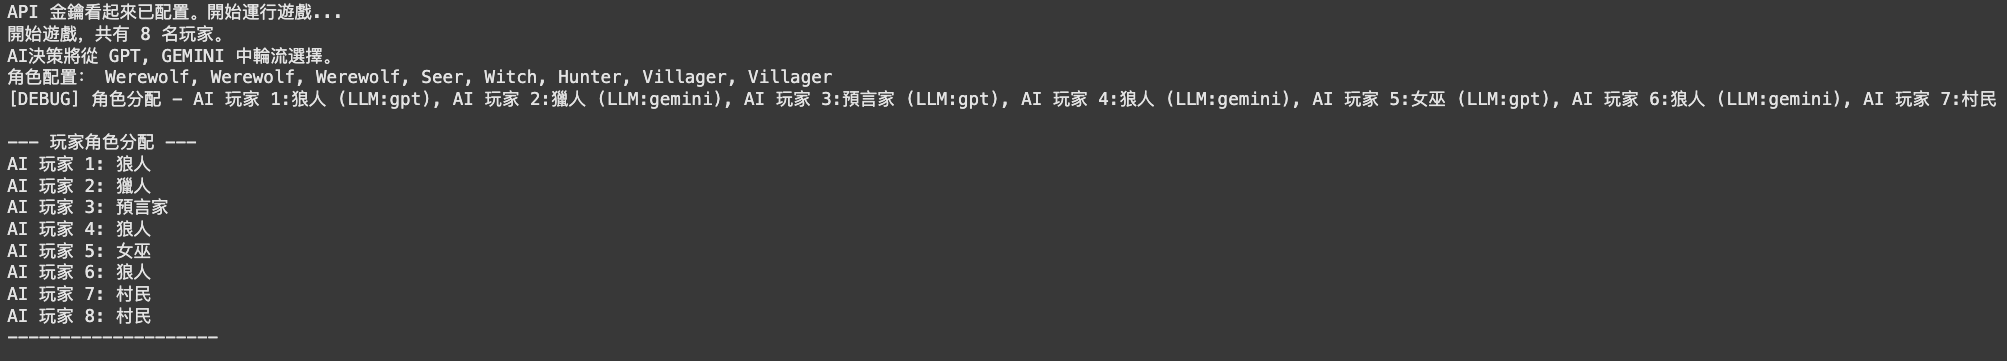

### 夜晚角色動作
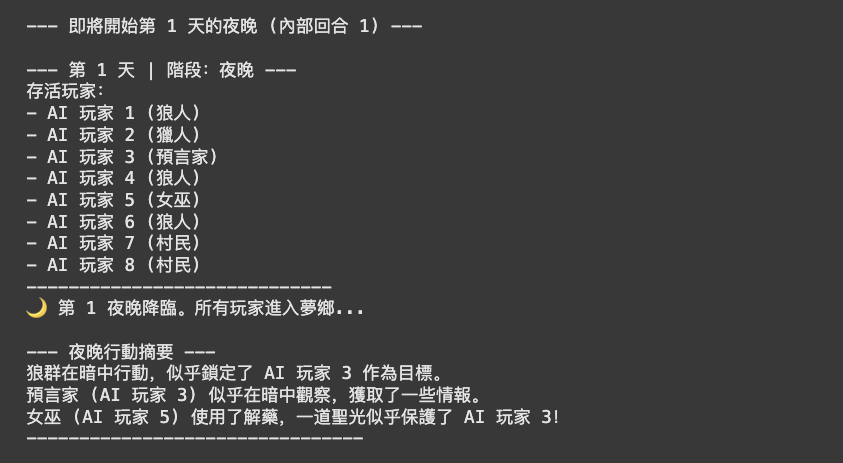

### 白天發言和投票過程
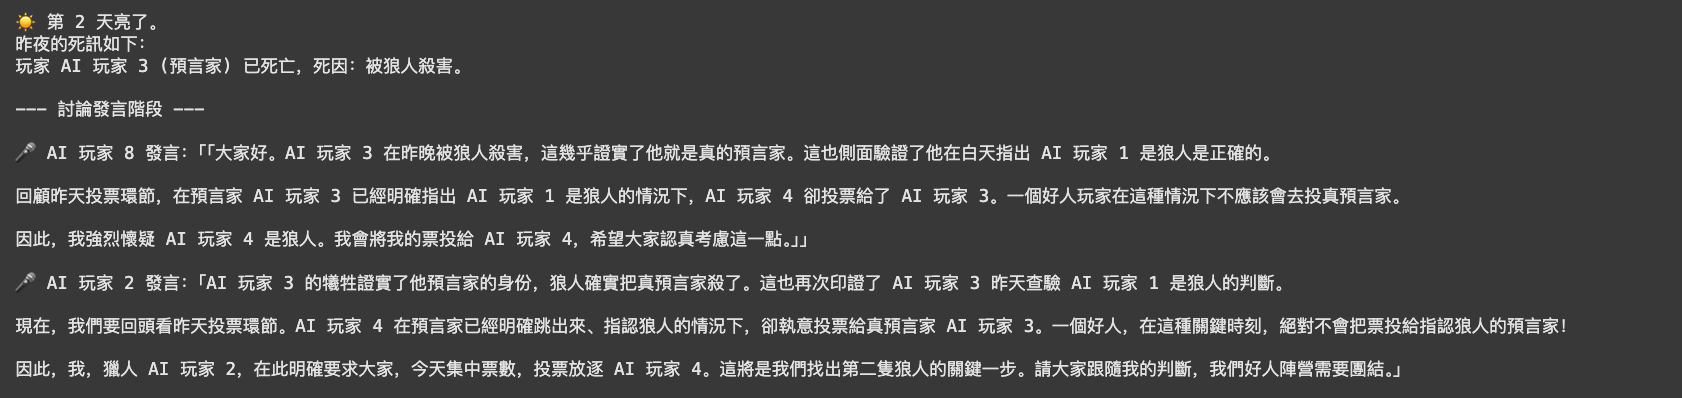

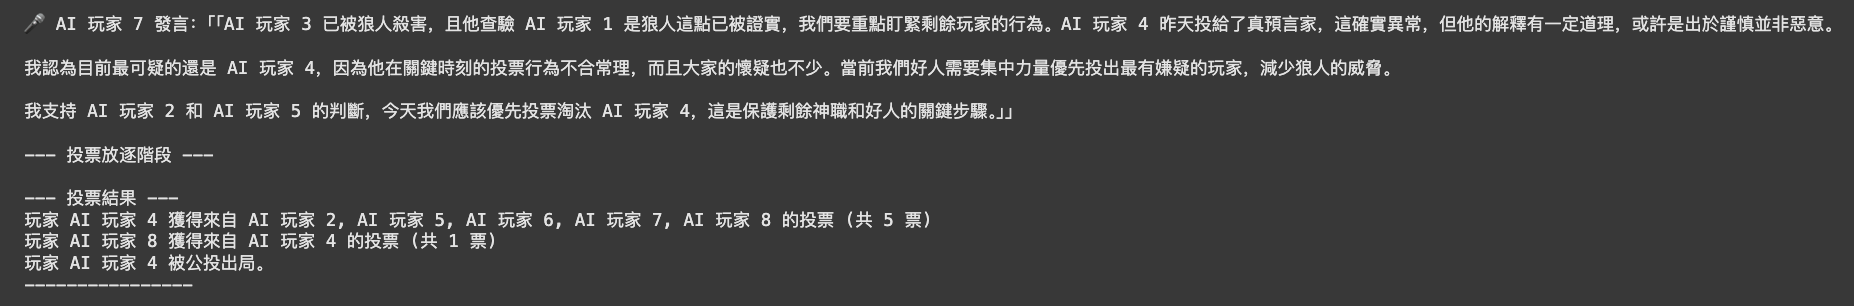

### 遊戲結束結算畫面
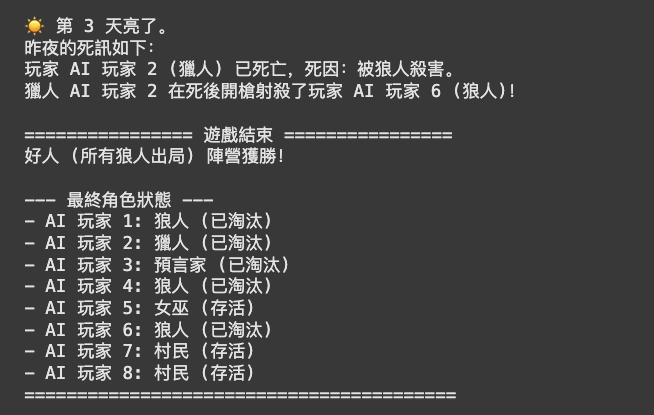

## 實作步驟

###  1：安裝必要的庫

In [ ]:
!pip install openai google-generativeai

###  2：創建 `config.py` (設定檔)

這個儲存格使用 `%%writefile config.py` 魔術命令在 Colab 的虛擬文件系統中創建一個名為 `config.py` 的文件。
該文件包含遊戲的所有配置信息，例如：
- **API 金鑰**：OpenAI 和 Gemini 的 API 金鑰（**請務必替換成你自己的金鑰！**）。
- **遊戲參數**：預設的玩家名稱列表。
- **角色配置**：針對不同玩家數量預設的角色分配列表（例如，6人局、7人局、8人局的狼人、神職、村民數量）。
- **LLM 設定**：預設使用的 GPT 和 Gemini 模型名稱。
- **Prompt 範本 **：
    - `SYSTEM_PROMPT_PREFIX_ZH_TW`: 給予 AI 玩家的通用系統級指示，包含遊戲背景、目標、當前狀態的格式等。
    - `ROLE_INFO_..._ZH_TW`: 針對不同角色（狼人、預言家、女巫、獵人、村民）的特定資訊和目標描述。
- **預設 Prompt 指向**：將通用的 Prompt 變數（如 `SYSTEM_PROMPT_PREFIX`）直接指向繁體中文版本，方便後續模組直接使用。

**重要：執行此儲存格前，請務必填寫你自己的 API 金鑰。**

In [ ]:
%%writefile config.py
# config.py



# 從 Colab Secrets 讀取 API 金鑰 (推薦方式，如果已設定)
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OpenAI') # 替換成你在Secrets中設定的名稱
GEMINI_API_KEY = userdata.get('Gemini') # 替換成你在Secrets中設定的名稱


# 遊戲參數
PLAYER_NAMES = [f"AI 玩家 {i+1}" for i in range(8)] # 假設6個AI玩家

# 角色配置範例
BASE_ROLES_CONFIG_6_PLAYERS = ["Werewolf", "Werewolf", "Seer", "Witch", "Villager", "Villager"]
BASE_ROLES_CONFIG_7_PLAYERS = ["Werewolf", "Werewolf", "Seer", "Witch", "Hunter", "Villager", "Villager"]
BASE_ROLES_CONFIG_8_PLAYERS = ["Werewolf", "Werewolf", "Werewolf", "Seer", "Witch", "Hunter", "Villager", "Villager"]


# LLM 設定
DEFAULT_GPT_MODEL = "gpt-4.1-mini"
DEFAULT_GEMINI_MODEL = "gemini-2.5-flash-preview-05-20"

# --- 繁體中文 Prompt ---
SYSTEM_PROMPT_PREFIX_ZH_TW = """
你正在參與一場狼人殺遊戲，你是一名AI玩家。
你的目標是幫助你所屬的陣營（好人方或狼人方）獲勝。
你需要根據你的角色、當前的遊戲狀態以及你擁有的資訊來做出決策和發言。
請讓你的回應簡潔並符合角色設定。
如果你需要輸出一個行動，例如目標玩家的ID，請嚴格地只輸出玩家ID（例如："AI 玩家 3"）。
如果被要求發言，請提供你的發言內容。
---
目前遊戲狀態：
總玩家數：{total_players}
你的玩家ID：{player_id}
你的角色：{player_role}
{role_specific_info}
存活玩家：{alive_players_list}
遊戲天數：第 {day_number} 天
目前階段：{current_phase}
遊戲日誌 (近期事件與發言摘要)：
{game_log_summary}
---
"""

ROLE_INFO_WEREWOLF_ZH_TW = "你的狼人隊友是：{teammates}。你的目標是消滅所有村民和神職。"
ROLE_INFO_SEER_ZH_TW = "你是預言家。每天晚上你可以查驗一名玩家的真實身份（狼人或好人）。"
ROLE_INFO_WITCH_ZH_TW = "你是女巫。你有一瓶解藥（剩餘：{heal_charges}）可以救人，也有一瓶毒藥（剩餘：{poison_charges}）可以殺人。兩瓶藥不能在同一晚使用。你會知道狼人當晚的目標是誰。"
ROLE_INFO_HUNTER_ZH_TW = "你是獵人。如果你被淘汰（被狼人殺死或被投票放逐），你可以選擇射殺場上一名存活玩家與你一同出局。如果你是被女巫毒死的，則不能開槍。"
ROLE_INFO_VILLAGER_ZH_TW = "你是村民。你的目標是找出並投票淘汰所有狼人。"

# 將預設 Prompt 指向中文版本
SYSTEM_PROMPT_PREFIX = SYSTEM_PROMPT_PREFIX_ZH_TW
ROLE_INFO_WEREWOLF = ROLE_INFO_WEREWOLF_ZH_TW
ROLE_INFO_SEER = ROLE_INFO_SEER_ZH_TW
ROLE_INFO_WITCH = ROLE_INFO_WITCH_ZH_TW
ROLE_INFO_HUNTER = ROLE_INFO_HUNTER_ZH_TW
ROLE_INFO_VILLAGER = ROLE_INFO_VILLAGER_ZH_TW

Writing config.py


### 3：創建 `llm_handler.py` (大型語言模型處理器)

此儲存格創建 `llm_handler.py` 文件，負責封裝與大型語言模型 (LLM) API 進行通訊的邏輯。
主要功能：
- **初始化 API 客戶端**：根據 `config.py` 中的 API 金鑰初始化 OpenAI 和 Gemini 的客戶端。
- **`get_llm_response` 函數**：
    - 接收一個完整的提示詞 (prompt)、指定的 LLM 提供者 (`gpt` 或 `gemini`) 以及用於日誌記錄的玩家 ID。
    - 向選擇的 LLM API 發送請求。
    - 處理 API 的回應，提取生成的文本內容。
    - 包含錯誤處理和重試機制，以應對可能的 API 呼叫失敗。
- **可選的測試程式碼** (`if __name__ == '__main__':`)：用於在直接運行此文件時測試 LLM API 連線是否正常 (在 Colab 中，這部分通常不會在 `main.py` 運行時觸發，除非你單獨執行此儲存格的內容並取消其 `if __name__` 的限制)。


In [ ]:
%%writefile llm_handler.py
# llm_handler.py
import openai
import google.generativeai as genai
import config # 導入 config.py 中的設定
import time


openai_client = openai.OpenAI(api_key=config.OPENAI_API_KEY)


# 配置 Gemini
genai.configure(api_key=config.GEMINI_API_KEY)

def get_llm_response(prompt: str, llm_provider: str = "gpt", player_id_for_log: str = "System") -> str:
    """
    獲取LLM的回應。
    :param prompt: 完整的提示詞
    :param llm_provider: 'gpt' 或 'gemini'
    :param player_id_for_log: 用於日誌記錄，標識是哪個玩家的請求
    :return: LLM的文字回應
    """
    # print(f"\n--- LLM Request from {player_id_for_log} using {llm_provider} ---")
    # print(prompt) # Debug: 印出完整的Prompt
    # print("---------------------------------------------------\n")

    max_retries = 3
    retry_delay = 5 # seconds

    for attempt in range(max_retries):
        try:
            if llm_provider.lower() == "gpt":

                response = openai_client.chat.completions.create(
                    model=config.DEFAULT_GPT_MODEL,
                    messages=[
                        {"role": "system", "content": "你是一位正在協助進行遊戲的AI助理。"},
                        {"role": "user", "content": prompt}
                    ],
                    temperature=0.7,
                    max_tokens=500
                )
                content = response.choices[0].message.content.strip()


            elif llm_provider.lower() == "gemini":
                model = genai.GenerativeModel(config.DEFAULT_GEMINI_MODEL)
                response = model.generate_content(prompt)
                content = response.text.strip()
            else:
                raise ValueError("不支援的 LLM 提供者。請選擇 'gpt' 或 'gemini'。")

            # print(f"\n--- LLM Response for {player_id_for_log} ---")
            # print(content) # Debug: 印出LLM回應
            # print("------------------------------------------\n")
            return content

        except Exception as e:
            print(f"LLM API 呼叫失敗 ({player_id_for_log}, 第 {attempt + 1}/{max_retries} 次嘗試): {e}")
            if attempt < max_retries - 1:
                time.sleep(retry_delay)
            else:
                print(f"LLM API 呼叫在 {max_retries} 次嘗試後仍然失敗 ({player_id_for_log})。返回預設錯誤訊息。")
                return f"錯誤：LLM ({llm_provider}) 無法回應 ({player_id_for_log})。"
    return f"錯誤：LLM ({llm_provider}) 在多次嘗試後依然無回應 ({player_id_for_log})。"

if __name__ == '__main__':
    # 測試LLM連線 (在Colab中，這段不會直接執行，除非你單獨運行這個儲存格的內容)
    if config.OPENAI_API_KEY and config.OPENAI_API_KEY != "YOUR_OPENAI_API_KEY":
        test_prompt_gpt = "你好，你是誰？"
        print(f"測試 GPT: {get_llm_response(test_prompt_gpt, 'gpt', 'TestGPT')}")
    else:
        print("OpenAI API 金鑰未設定或為預設值，跳過 GPT 測試。")

    if config.GEMINI_API_KEY and config.GEMINI_API_KEY != "YOUR_GEMINI_API_KEY":
        test_prompt_gemini = "嗨，你叫什麼名字？"
        print(f"測試 Gemini: {get_llm_response(test_prompt_gemini, 'gemini', 'TestGemini')}")
    else:
        print("Gemini API 金鑰未設定或為預設值，跳過 Gemini 測試。")

Writing llm_handler.py


In [ ]:
import openai
import google.generativeai as genai
import config # 導入 config.py 中的設定
import time
import llm_handler
if __name__ == '__main__':
    # 測試LLM連線 (在Colab中，這段不會直接執行，除非你單獨運行這個儲存格的內容)
    if config.OPENAI_API_KEY and config.OPENAI_API_KEY != "YOUR_OPENAI_API_KEY":
        test_prompt_gpt = "你好，你是誰？"
        print(f"測試 GPT: {llm_handler.get_llm_response(test_prompt_gpt, 'gpt', 'TestGPT')}")
    else:
        print("OpenAI API 金鑰未設定或為預設值，跳過 GPT 測試。")

    if config.GEMINI_API_KEY and config.GEMINI_API_KEY != "YOUR_GEMINI_API_KEY":
        test_prompt_gemini = "嗨，你叫什麼名字？"
        print(f"測試 Gemini: {llm_handler.get_llm_response(test_prompt_gemini, 'gemini', 'TestGemini')}")
    else:
        print("Gemini API 金鑰未設定或為預設值，跳過 Gemini 測試。")

測試 GPT: 你好！我是你的AI助理，隨時準備幫助你解答問題或提供遊戲相關的協助。你有什麼需要幫忙的嗎？
測試 Gemini: 嗨！我沒有名字。我是一個大型語言模型，由 Google 訓練。


### 儲存格 4：創建 `roles.py` (角色定義)

此儲存格創建 `roles.py` 文件，用於定義遊戲中的各種角色及其行為。
主要內容：
- **`Role` 抽象基底類 (ABC)**：
    - 定義所有角色的通用介面，如角色名稱 (`name`)、陣營 (`faction`)。
    - 包含抽象方法 `get_role_specific_info`，要求子類實現以提供角色特定的提示資訊。
    - 提供預設的夜晚行動 (`perform_night_action`)、發言提示 (`get_speak_prompt`)、投票提示 (`get_vote_prompt`) 和死亡效果 (`on_death_effect`) 方法，子類可以覆寫這些方法以實現特定角色的邏輯。
- **具體角色類** (繼承自 `Role`)：
    - `Villager` (村民)
    - `Werewolf` (狼人)
    - `Seer` (預言家)
    - `Witch` (女巫)
    - `Hunter` (獵人)
    - 每個角色類實現其特有的夜晚行動邏輯（例如狼人殺人、預言家查人、女巫用藥）、提供角色專屬的資訊給 Prompt，以及處理可能的死亡效果（如獵人開槍）。
    - 行動決策通常依賴於從 `llm_handler` 獲取的 LLM 回應。
    - 對於 LLM 可能產生的無效輸出，包含了一些基本的隨機選擇作為後備方案。
- **`ROLES_MAP` 字典和 `get_role_instance` 函數**：
    - `ROLES_MAP` 將角色名稱字串映射到對應的角色類。
    - `get_role_instance` 函數根據角色名稱創建並返回相應的角色物件實例。



In [ ]:
%%writefile roles.py
# roles.py
from abc import ABC, abstractmethod
from typing import List, Dict, TYPE_CHECKING, Optional, Union
import random

if TYPE_CHECKING:
    from player import Player # Forward declaration for type hinting
    from game_manager import GameManager # Forward declaration

import config # 導入 config.py 中的設定

class Role(ABC):
    def __init__(self, name: str, faction: str):
        self.name = name
        self.faction = faction # "Good" (好人) or "Evil" (狼人)

    @abstractmethod
    def get_role_specific_info(self, player: 'Player', game: 'GameManager') -> str:
        """獲取此角色在Prompt中需要的特定資訊"""
        pass

    def perform_night_action(self, player: 'Player', game: 'GameManager', llm_handler, ui_handler) -> Optional[Union[Dict, List[Dict]]]:
        """執行夜晚動作。返回一個包含動作類型和目標的字典，或None，女巫可能返回列表"""
        return None

    def get_speak_prompt(self, player: 'Player', game: 'GameManager') -> str:
        """生成發言時的特定任務提示"""
        return ("輪到你發言了。請詳細分析目前的局勢，包括：\n"
            "1. 根據已知信息（夜晚事件、其他人的發言、投票情況），你懷疑誰是狼人？請給出你的理由。\n"
            "2. 你認為哪些玩家更像是好人？為什麼？\n"
            "3. 根據你的角色和陣營目標，你接下來的策略是什麼？\n"
            "請清晰地表達你的觀點，幫助你的陣營獲勝。你的發言內容將是？")

    def get_vote_prompt(self, player: 'Player', game: 'GameManager') -> str:
        """生成投票時的特定任務提示"""
        alive_players_for_vote = [p.player_id for p in game.players if p.is_alive and p.player_id != player.player_id]
        if not alive_players_for_vote:
            return "沒有其他存活玩家可以投票。"
        return f"現在是投票放逐一名玩家的時候了。根據場上的討論和你的判斷，你投票給誰？請從以下玩家中選擇：{', '.join(alive_players_for_vote)}。請只輸出玩家的ID。"

    def on_death_effect(self, player: 'Player', game: 'GameManager', llm_handler, ui_handler, killed_by_witch_poison: bool = False) -> Optional[Dict]:
        """處理死亡時的被動效果，例如獵人開槍"""
        return None

class Villager(Role):
    def __init__(self):
        super().__init__("村民", "Good")

    def get_role_specific_info(self, player: 'Player', game: 'GameManager') -> str:
        return config.ROLE_INFO_VILLAGER + \
               " 你雖然是普通村民，但你的投票至關重要。仔細聆聽，清晰表達。"
    def get_speak_prompt(self, player: 'Player', game: 'GameManager') -> str:
        """為村民生成特定的發言提示。"""
        prompt = (
            "輪到你發言了。你是一名村民，你的目標是幫助找出並投票淘汰所有狼人。\n"
            "雖然你沒有特殊技能，但你的邏輯和判斷力非常重要：\n"
            "1. 仔細聆聽每個人的發言，並結合夜晚的死訊：死亡的是神職還是村民？這是否暗示了狼人的策略（屠神或屠民，參考神民存活數量）？\n"
            "2. 分析投票情況：之前的投票是否奇怪？誰投給了誰？\n"
            "3. 找出可信賴的玩家：是否有看起來像神職（如預言家）的玩家給出了明確信息？\n"
            "4. 表達你的懷疑：如果你懷疑某人是狼人，請說出你的理由。\n"
            "5. 保護關鍵陣營：如果感覺狼人在屠神，要努力找出並保護真神(可能可以透過跳假身分)。如果狼人在屠民，要更積極地找出狼人並把他們投出去並且隱藏自己的身分如果你覺得場上村民數量很少了。\n"
            "作為一個正直的村民，請根据場上的信息和你的分析，清晰地表達你的觀點和懷疑對象。你會說什么？"
        )
        return prompt

class Werewolf(Role):
    def __init__(self):
        super().__init__("狼人", "Evil")

    def get_role_specific_info(self, player: 'Player', game: 'GameManager') -> str:
        teammates = [p.player_id for p in game.players if p.is_alive and isinstance(p.role, Werewolf) and p.player_id != player.player_id] # 確保 p 是 Player 實例
        base_info = config.ROLE_INFO_WEREWOLF.format(teammates=', '.join(teammates) if teammates else "無 (你是唯一的狼人，或是第一個行動的狼人)") + \
                      " 記住，你的首要任務是隱藏你的狼人身份和你的隊友，並誤導好人陣營。"

        # 計算存活神民數量
        alive_gods_count = sum(1 for p_role_check in game.players if p_role_check.is_alive and isinstance(p_role_check.role, (Seer, Witch, Hunter)))
        alive_villagers_count = sum(1 for p_role_check in game.players if p_role_check.is_alive and isinstance(p_role_check.role, Villager))

        # 提醒狼人新的勝利條件
        # 可以在 config.py 中定義一個通用的狼人勝利條件描述
        # 例如：WEREWOLF_VICTORY_CONDITION_ZH_TW = "狼人勝利條件：所有神職出局 或 所有村民出局，或者人數形成絕對優勢。"
        # 這裡我們先硬編碼，之後可以移到 config
        victory_condition_info = "\n狼人勝利提醒：你們可以通過消滅所有神職角色，或者消滅所有村民角色來獲勝。"

        situation_info = f"\n當前局勢參考：存活神職 {alive_gods_count} 人，存活村民 {alive_villagers_count} 人。"

        return base_info + situation_info + victory_condition_info

    def perform_night_action(self, player: 'Player', game: 'GameManager', llm_handler, ui_handler) -> Optional[Dict]:
        if not game.werewolf_kill_target_chosen_this_night: # 確保狼隊只選擇一次目標
            valid_targets = [p.player_id for p in game.players if p.is_alive and not isinstance(p.role, Werewolf)]
            if not valid_targets:
                ui_handler.display_message(f"{player.player_id} (狼人): 沒有有效的擊殺目標。", log_only=True)
                return None

            prompt_task = (
                f"輪到你和你的狼人隊友選擇一名玩家淘汰了。"
                f"你們的勝利條件是消滅所有神職，或所有村民，你要想辦法判斷哪些是神職哪些是村民以及目前情勢先殺誰對狼人陣營有利。"
                f"你們的目標是誰？請從以下玩家中選擇：{', '.join(valid_targets)}。請只輸出玩家的ID。"
            )
            prompt = game.construct_prompt_for_player(player, prompt_task)
            # 使用 player.llm_model_type
            target_id = llm_handler(prompt, llm_provider=player.llm_model_type, player_id_for_log=player.player_id).strip()

            if target_id in valid_targets:
                ui_handler.display_message(f"{player.player_id} (狼人) 提議擊殺：{target_id}", log_only=True)
                return {"action_type": "werewolf_kill", "target_id": target_id, "actor_id": player.player_id}
            else:
                # 如果LLM返回無效目標，則隨機選擇一個
                if not valid_targets: # 再次檢查以防萬一 (雖然前面檢查過了)
                    return None
                chosen_target = random.choice(valid_targets)
                ui_handler.display_message(f"{player.player_id} (狼人) 提供的目標無效 ({target_id})。隨機選擇：{chosen_target}", log_only=True)
                return {"action_type": "werewolf_kill", "target_id": chosen_target, "actor_id": player.player_id}
        return None # 如果狼隊本輪已選擇過目標，則其他狼人不再行動
    def get_speak_prompt(self, player: 'Player', game: 'GameManager') -> str:
        """為狼人生成特定的發言提示，強調隱藏身份和誤導。"""
        # 獲取狼人隊友，但不直接在任務提示中列出，避免AI直接複述
        # 這些信息已經在 role_specific_info 中了
        # teammates_alive = [p.player_id for p in game.players if isinstance(p.role, Werewolf) and p.is_alive and p.player_id != player.player_id]

        prompt = (
            "輪到你發言了。你是一名狼人，你的首要任務是欺騙好人陣營，活到最後並消滅他們。\n"
            "**絕對不要在發言中承認你是狼人，也絕對不要提及你的狼人隊友的身份！**\n"
            "你的發言應該聽起來像一個無辜的好人（村民或神民），目的是：\n"
            "1. 偽裝自己：讓別人相信你是好人。\n"
            "2. 混淆視聽：可以提出一些看起來合理的分析，但實際上是為了誤導好人，或者將懷疑轉移到其他好人身上。\n"
            "3. 保護隊友：如果你的狼人隊友被懷疑，嘗試為他們辯解（但不要暴露你們的關係）。\n"
            "4. 找出神職：試探性地發言，觀察誰的反應像神職，為夜晚的行動提供目標。\n"
            "5. 引導投票：根據你們的屠邊策略（是優先屠神還是屠民），巧妙地將懷疑引向對你們威脅較小的一方，或者直接攻擊你們屠邊路線上的關鍵好人角色。\n"
            "請根據當前的遊戲日誌和場上情況，發表一段聽起來像好人的高水平發言。你會說什麼？"
        )
        return prompt

class Seer(Role):
    def __init__(self):
        super().__init__("預言家", "Good")
        self.checked_players_this_game = set() # 記錄本局已查驗過的玩家，避免重複查驗

    def get_role_specific_info(self, player: 'Player', game: 'GameManager') -> str:
        seer_knowledge = "\n你已查驗的身份資訊：\n"
        if player.private_knowledge.get("seer_results"):
            for target, role_type in player.private_knowledge["seer_results"].items():
                seer_knowledge += f"- {target} 的身份是：{role_type}\n"
        else:
            seer_knowledge += "- 尚未查驗任何人。\n"
        return config.ROLE_INFO_SEER + seer_knowledge + \
               " 你的發言非常關鍵，需要謹慎地引導好人，同時保護自己。"

    def perform_night_action(self, player: 'Player', game: 'GameManager', llm_handler, ui_handler) -> Optional[Dict]:
        valid_targets = [p.player_id for p in game.players if p.is_alive and p.player_id != player.player_id and p.player_id not in self.checked_players_this_game]
        if not valid_targets:
            ui_handler.display_message(f"{player.player_id} (預言家): 沒有新的玩家可以查驗。", log_only=True)
            return None

        prompt_task = f"輪到你查驗一名玩家的身份了（狼人或好人）。你想查驗誰？請從以下玩家中選擇：{', '.join(valid_targets)}。請只輸出玩家的ID。"
        prompt = game.construct_prompt_for_player(player, prompt_task)
         # 使用 player.llm_model_type
        target_id = llm_handler(prompt, llm_provider=player.llm_model_type, player_id_for_log=player.player_id).strip()

        if target_id in valid_targets:
            self.checked_players_this_game.add(target_id) # 記錄已查驗
            return {"action_type": "seer_check", "target_id": target_id, "actor_id": player.player_id}
        else:
            if not valid_targets: return None # 以防萬一
            chosen_target = random.choice(valid_targets)
            self.checked_players_this_game.add(chosen_target) # 記錄已查驗
            ui_handler.display_message(f"{player.player_id} (預言家) 提供的目標無效 ({target_id})。隨機選擇：{chosen_target}", log_only=True)
            return {"action_type": "seer_check", "target_id": chosen_target, "actor_id": player.player_id}
    def get_speak_prompt(self, player: 'Player', game: 'GameManager') -> str:
        """為預言家生成特定的發言提示。"""
        checked_info_str = ""
        if player.private_knowledge.get("seer_results"):
            checked_info_str = "你目前已知的查驗結果：\n"
            for target, role_type in player.private_knowledge["seer_results"].items():
                checked_info_str += f"- {target} 是 {role_type}。\n"
        else:
            checked_info_str = "你還沒有查驗過任何人。\n"

        prompt = (
            "輪到你發言了。你是一名預言家，掌握著關鍵的身份信息。你的目標是幫助好人找出狼人。\n"
            f"{checked_info_str}"
            "你需要考慮：\n"
            "1. 是否以及如何透露你的查驗結果？\n"
            "2. 如果你查到了狼人，如何說服大家相信你並投票給他？\n"
            "3. 如果你查到了好人，如何利用這個信息來排除嫌疑，或者建立好人團隊？\n"
            "4. 如何在傳遞信息的同時保護自己不被狼人輕易找出並在夜晚殺害？\n"
            "5. 觀察狼人可能的動向（他們是在嘗試殺光神職還是村民量）？你的查驗和發言如何能阻止他們？\n"
            "請根據你的查驗結果和場上局勢，發表一段有策略的言論，引導好人走向勝利。你會說什麼？"
        )
        return prompt

class Witch(Role):
    def __init__(self):
        super().__init__("女巫", "Good")
        self.heal_charges = 1 # 解藥數量
        self.poison_charges = 1 # 毒藥數量

    def get_role_specific_info(self, player: 'Player', game: 'GameManager') -> str:
        info = config.ROLE_INFO_WITCH.format(heal_charges=self.heal_charges, poison_charges=self.poison_charges)
        info += "\n你的藥劑非常寶貴，發言時要謹慎決定是否透露用藥信息。"
        # 女巫看到的 "昨晚狼人目標" (實際上是本輪夜晚到她行動前狼人選的目標)
        # 這個信息主要用於夜晚決策，發言時可能幫助不大，除非她救了人且知道是誰
        wolf_target_tonight = game.round_data.get("killed_by_werewolf")
        if game.current_phase == "夜晚" and (self.heal_charges > 0 or self.poison_charges > 0) : # 只在夜晚且有藥時提示狼刀
            if wolf_target_tonight:
                info += f"\n注意：今晚狼人襲擊的目標目前看起來是：{wolf_target_tonight}。(此信息僅女巫知道，用於你夜晚的決策)"
        return info

    def perform_night_action(self, player: 'Player', game: 'GameManager', llm_handler, ui_handler) -> Optional[List[Dict]]: # 女巫可能執行多個動作（理論上是一個，但分開問LLM）
        killed_by_werewolf_id = game.round_data.get("killed_by_werewolf") # 從遊戲管理員獲取狼人目標
        actions_this_night = [] # 儲存女巫本晚的行動

        # 詢問是否使用解藥
        if self.heal_charges > 0 and killed_by_werewolf_id: # 有解藥且有人被狼殺
            prompt_task_heal = (f"玩家 {killed_by_werewolf_id} 今晚成為了狼人的目標。"
                               f"你是否要對 {killed_by_werewolf_id} 使用解藥（剩餘：{self.heal_charges}）？請回答「是」或「否」。")
            prompt_heal = game.construct_prompt_for_player(player, prompt_task_heal)
            # 使用 player.llm_model_type
            decision_heal = llm_handler(prompt_heal, llm_provider=player.llm_model_type, player_id_for_log=player.player_id).strip()
            # 簡單判斷LLM的肯定回答
            if "是" in decision_heal or "yes" in decision_heal.lower(): # 允許 "是" 或 "Yes"
                actions_this_night.append({"action_type": "witch_heal", "target_id": killed_by_werewolf_id, "actor_id": player.player_id})
                # 可以在這裡記錄到 player.private_knowledge
                player.private_knowledge['used_heal_on_round'] = game.day_number
                player.private_knowledge['heal_target'] = killed_by_werewolf_id

        used_heal_this_turn = any(a["action_type"] == "witch_heal" for a in actions_this_night)

        # 詢問是否使用毒藥 (如果本輪未使用解藥)
        if self.poison_charges > 0 and not used_heal_this_turn:
            valid_poison_targets = [p.player_id for p in game.players if p.is_alive and p.player_id != player.player_id] # 不能毒自己
            if not valid_poison_targets:
                ui_handler.display_message(f"{player.player_id} (女巫): 沒有可以下毒的目標。", log_only=True)
            else:
                prompt_task_poison = (f"你是否要在今晚使用毒藥（剩餘：{self.poison_charges}）？"
                                     f"如果要，請從以下玩家選擇一名下毒目標：{', '.join(valid_poison_targets)}。請回答「否」或直接輸出目標玩家的ID。")
                prompt_poison = game.construct_prompt_for_player(player, prompt_task_poison)
                # 使用 player.llm_model_type
                decision_poison = llm_handler(prompt_poison, llm_provider=player.llm_model_type, player_id_for_log=player.player_id).strip()

                # 判斷是否為有效目標ID，且不是明確的 "否"
                if decision_poison.lower() != "否" and decision_poison.lower() != "no" and decision_poison in valid_poison_targets:
                    actions_this_night.append({"action_type": "witch_poison", "target_id": decision_poison, "actor_id": player.player_id})
                    player.private_knowledge['used_poison_on_round'] = game.day_number
                    player.private_knowledge['poison_target'] = decision_poison
                elif decision_poison.lower() != "否" and decision_poison.lower() != "no": # 提供了ID但無效
                     ui_handler.display_message(f"{player.player_id} (女巫) 提供的下毒目標無效：{decision_poison}。", log_only=True)
                     # 此處未做隨機選擇，女巫毒藥較珍貴，無效則跳過

        return actions_this_night if actions_this_night else None

        def get_speak_prompt(self, player: 'Player', game: 'GameManager') -> str:
            """為女巫生成特定的發言提示。"""
            # 獲取女巫是否用過藥的信息，可以從 player.private_knowledge 或角色屬性判斷
            heal_left = self.heal_charges
            poison_left = self.poison_charges
            med_status = f"你目前擁有解藥 {heal_left} 瓶，毒藥 {poison_left} 瓶。"

            # 獲取上一晚狼人刀口信息 (這個信息在 get_role_specific_info 中也有，確保一致性)
            wolf_target_info = ""
            # 注意：game.round_data 是上一晚的數據，當女巫發言時，是新的一天，
            # round_data 可能已經被清空或更新為當前夜晚的初始狀態。
            # 我們需要的是 "昨晚" 的信息。
            # 這需要在 GameManager.play_round 中，在進入白天發言前，將昨夜狼人目標信息傳遞給女巫的 private_knowledge
            # 或者，在女巫夜晚行動結束時就存儲。
            # 假設在 perform_night_action 或 get_role_specific_info 中已經處理好了昨晚狼刀信息
            # 並且存儲在 player.private_knowledge['last_night_wolf_target']
            last_night_wolf_target = player.private_knowledge.get('last_night_wolf_target') # 需要在 game_manager 中設定這個值


            if last_night_wolf_target:
                wolf_target_info = f"根據你的信息，昨晚 {last_night_wolf_target} 是狼人的目標。"
                # 可以加入自己是否救了此人的信息
                if player.private_knowledge.get('used_heal_on_round') == game.day_number -1 and player.private_knowledge.get('heal_target') == last_night_wolf_target:
                   wolf_target_info += " 你昨晚對其使用了珍貴的解藥。"
            else:
                wolf_target_info = "昨晚似乎是平安夜，或者狼人的目標未知。"

            prompt = (
            "輪到你發言了。你是一名女巫，手握生死大權。你的目標是幫助好人陣營。\n"
            f"{med_status}\n"
            "你需要考慮：\n"
            "1. 昨晚是否平安夜？如果是，而你又使用了藥（特別是解藥），這說明了什麼？\n"
            "2. 昨晚有誰死了？死因是什麼？這是否和你用藥的決策有關？\n"
            "3. 是否透露你使用了藥劑？如果用了，是解藥還是毒藥？用在了誰身上（如果你知道且願意說）？\n"
            "4. 透露信息的好處是可以明確某人的身份，但壞處是可能暴露自己，並讓狼人知道你的藥劑情況。\n"
            "5. 如果你還有毒藥，是否要暗示你可能會在今晚使用？或者迷惑狼人？\n"
            "6. 考慮狼人的屠邊策略：如果狼人明顯在屠神，你的解藥是否應該優先留給被威脅的神？如果狼人在屠民，你的毒藥是否應該更果斷地找出並消滅狼人以保護村民數量？\n"
            "請根據你的藥劑情況、昨晚的遊戲結果（死訊）和場上局勢，發表一段有策略的言論。你會說什麼？"
            )
            return prompt

class Hunter(Role):
    def __init__(self):
        super().__init__("獵人", "Good")
        self.can_shoot_on_death = True # 標記獵人是否能在死亡時開槍

    def get_role_specific_info(self, player: 'Player', game: 'GameManager') -> str:
        return config.ROLE_INFO_HUNTER + \
               " 你有強大的反擊能力，發言時可以強勢，但也要小心被女巫毒殺而無法開槍。"

    def on_death_effect(self, player: 'Player', game: 'GameManager', llm_handler, ui_handler, killed_by_witch_poison: bool = False) -> Optional[Dict]:
        if killed_by_witch_poison:
            self.can_shoot_on_death = False # 被女巫毒死則不能開槍
            ui_handler.display_message(f"{player.player_id} (獵人) 因為被女巫毒死，無法開槍。")
            return None

        if self.can_shoot_on_death and player.is_dead_this_round: # 確保是本回合死亡且可以開槍
            alive_targets = [p.player_id for p in game.players if p.is_alive and p.player_id != player.player_id] # 不能射自己
            if not alive_targets:
                ui_handler.display_message(f"{player.player_id} (獵人) 死亡，但場上已無其他存活玩家可射擊。")
                return None

            prompt_task = (f"你已經死亡，但你可以開槍帶走一名玩家！你要射誰？"
                           f"請從以下玩家中選擇：{', '.join(alive_targets)}。請只輸出玩家的ID。")
            prompt = game.construct_prompt_for_player(player, prompt_task)
            target_id = llm_handler(prompt, llm_provider=player.llm_model_type, player_id_for_log=player.player_id).strip()

            if target_id in alive_targets:
                return {"action_type": "hunter_shoot", "target_id": target_id, "actor_id": player.player_id}
            else:
                if not alive_targets: return None # 以防萬一
                chosen_target = random.choice(alive_targets)
                ui_handler.display_message(f"{player.player_id} (獵人) 提供的射擊目標無效 ({target_id})。隨機選擇：{chosen_target}", log_only=True)
                return {"action_type": "hunter_shoot", "target_id": chosen_target, "actor_id": player.player_id}
        return None

    def get_speak_prompt(self, player: 'Player', game: 'GameManager') -> str:
        """為獵人生成特定的發言提示。"""
        prompt = (
            "輪到你發言了。你是一名獵人，一個強大的好人角色，即使死亡也能帶走一個敵人。\n"
            "你的發言可以選擇：\n"
            "1. 強勢表態：明確表達你的好人身份和決心，威懾狼人不敢輕易動你。\n"
            "2. 隱藏身份：像一個普通村民一樣發言，但在關鍵時刻可以跳出來保護其他神職或帶隊投票。\n"
            "3. 分析局勢：指出你懷疑的狼人，並說明理由。\n"
            "思考：\n"
            "- 如果你被投票出局或被狼人殺害，你會選擇射誰？你的發言可以為你死後的選擇做鋪墊。\n"
            "- 場上是否有比你更重要的神職需要保護？考慮狼人可能的屠邊策略（屠神或屠民），你的槍口應該指向誰來阻止他們？\n"
            "- 如果女巫的毒藥還在，你要小心不要被她誤毒，否則無法開槍。\n"
            "請根據場上情況，發表一段有力的、符合你獵人身份的言論。你會說什麼？"
        )
        return prompt

# 角色名稱到類別的映射，方便實例化
ROLES_MAP = {
    "Villager": Villager,
    "Werewolf": Werewolf,
    "Seer": Seer,
    "Witch": Witch,
    "Hunter": Hunter,
}

def get_role_instance(role_name: str) -> Role:
    """根據角色名稱字符串獲取角色類的實例"""
    role_class = ROLES_MAP.get(role_name)
    if not role_class:
        raise ValueError(f"未知的角色名稱：{role_name}")
    return role_class()

Writing roles.py


### 5：創建 `player.py` (玩家類別)

此儲存格創建 `player.py` 文件，定義了 `Player` 類別。
`Player` 類用於表示遊戲中的每一位玩家（無論是 AI 還是未來可能的真人玩家）。
主要屬性：
- `player_id` (str): 玩家的唯一標識符（例如 "AI 玩家 1"）。
- `role` (Role): 該玩家所扮演的角色物件（來自 `roles.py`）。
- `is_alive` (bool): 標記玩家是否仍然存活。
- `is_human` (bool): 標記玩家是否為真人玩家（預留給未來擴展）。
- `votes_received_this_round` (int): 本回合該玩家獲得的票數。
- `private_knowledge` (dict): 儲存該玩家的私有資訊，例如預言家的查驗結果。
- `is_dead_this_round` (bool): 標記玩家是否在本回合（夜晚或白天投票）中死亡，主要用於處理像獵人這樣的死亡觸發技能。

主要方法：
- `__str__`：定義玩家物件的字串表示，方便打印和日誌記錄。
- `get_role_specific_info`：調用其角色物件的同名方法，獲取角色專屬的提示資訊。
- **預留給真人玩家的方法**：
    - `get_human_night_action`
    - `get_human_speech`
    - `get_human_vote`
    這些方法目前是佔位符，未來若要加入真人玩家，則會在這裡實現獲取真人輸入的邏輯。

這個類將玩家的狀態和其扮演的角色關聯起來。

In [ ]:
%%writefile player.py
# player.py
from typing import Optional, Dict, TYPE_CHECKING

# TYPE_CHECKING 和向前宣告用於處理類型提示的循環依賴問題
if TYPE_CHECKING:
    from roles import Role # 告訴類型檢查器 Role 是什麼，但不在運行時導入
    from game_manager import GameManager # 同上

class Player:
    def __init__(self, player_id: str, role: 'Role', llm_model_type: str = "gpt", is_human: bool = False):
        self.player_id: str = player_id
        self.role: 'Role' = role # 實際運行時，role 會是 Role 的一個實例
        self.llm_model_type: str = llm_model_type # 儲存玩家的LLM類型
        self.is_alive: bool = True
        self.is_human: bool = is_human # 為了未來擴展加入真人玩家
        self.votes_received_this_round: int = 0 # 本回合獲得的票數
        self.private_knowledge: Dict = {} # 儲存玩家的私有資訊，例如預言家的查驗結果
        self.is_dead_this_round: bool = False # 標記是否在本回合（夜晚或白天投票）中死亡

    def __str__(self):
        """返回玩家物件的字串表示，方便日誌和調試"""
        status = "存活" if self.is_alive else "已淘汰"
        return f"{self.player_id} (角色: {self.role.name}, LLM: {self.llm_model_type}, 狀態: {status})"

    def get_role_specific_info(self, game: 'GameManager') -> str:
        """獲取並返回該玩家角色特定的提示資訊"""
        return self.role.get_role_specific_info(self, game)

    # --- 以下為未來真人玩家預留的介面 ---
    def get_human_night_action(self, game: 'GameManager', ui_handler) -> Optional[Dict]:
        """獲取真人玩家的夜晚行動 (未來實現)"""
        if not self.is_human: # 理論上不應該調用到這裡，除非邏輯錯誤
            return None
        # 實際應用中，這裡會根據角色類型提示不同的輸入，並解析輸入
        ui_handler.display_message(f"{self.player_id} ({self.role.name})，輪到你執行夜晚動作了。")
        action_input = ui_handler.get_human_input(f"請輸入你的行動指令：")
        # TODO: 解析 action_input 並轉換為標準的行動字典格式
        # 例如： "查驗 AI 玩家 2" -> {"action_type": "seer_check", "target_id": "AI 玩家 2", "actor_id": self.player_id}
        ui_handler.display_message(f"(佔位符：真人玩家 {self.player_id} 輸入了 {action_input})", log_only=True)
        return None # 目前返回 None，表示未實現

    def get_human_speech(self, game: 'GameManager', ui_handler) -> str:
        """獲取真人玩家的發言 (未來實現)"""
        if not self.is_human:
            return "錯誤：非真人玩家，無法獲取發言。"
        speech = ui_handler.get_human_input(f"{self.player_id}，請發表你的言論：")
        return speech

    def get_human_vote(self, game: 'GameManager', ui_handler) -> str:
        """獲取真人玩家的投票目標 (未來實現)"""
        if not self.is_human:
            return "錯誤：非真人玩家，無法投票。"

        alive_players_for_vote = [p.player_id for p in game.players if p.is_alive and p.player_id != self.player_id]
        if not alive_players_for_vote:
            ui_handler.display_message("沒有其他存活玩家可以投票。", delay=0)
            return "" # 表示棄票或無效票

        vote_prompt = f"{self.player_id}，請投票（可投票對象：{', '.join(alive_players_for_vote)}）："
        vote_target = ui_handler.get_human_input(vote_prompt)

        # TODO: 驗證 vote_target 是否有效
        if vote_target not in alive_players_for_vote:
            ui_handler.display_message(f"投票目標 '{vote_target}' 無效。請重新輸入或視為棄票。", delay=0)
            # 可以加入重新輸入的邏輯，或直接視為棄票
            return "" # 暫時視為棄票
        return vote_target

Writing player.py


### 6：創建 `ui_terminal.py` (終端使用者介面)

此儲存格創建 `ui_terminal.py` 文件，定義了 `TerminalUI` 類別。
這個類別負責處理所有在終端 (console) 上的遊戲資訊輸出。
主要方法：
- `__init__`：接收一個日誌記錄函數 (`game_log_func`)，這樣所有通過 UI 顯示的訊息也會被記錄到遊戲日誌中。
- `display_message`：在終端打印訊息，並可選擇性地加入延遲（方便玩家閱讀）。同時也將訊息傳給日誌記錄函數。
- `display_player_roles`：顯示玩家的角色分配（可選擇是否全部顯示，用於 GM 視角或 Debug 模式）。
- `display_game_state`：顯示當前的遊戲天數、階段以及存活玩家列表。
- `display_night_actions_summary`：匯總並顯示夜晚發生的重要行動。
- `display_voting_results`：顯示投票的詳細票數和被放逐的玩家。
- `get_human_input`：(預留給未來) 從終端獲取真人玩家的輸入。
- `display_game_over`：顯示遊戲結束的訊息、勝利方以及所有玩家的最終角色狀態。
- `display_player_speech`：格式化並顯示玩家的發言。

將 UI 邏輯封裝在一個單獨的類中，使得未來如果想更換成圖形化介面 (GUI) 或網頁介面 (Web UI) 會更加容易，只需要替換這個 UI 模組的實現，而不需要大幅修改遊戲核心邏輯。

In [ ]:
%%writefile ui_terminal.py
# ui_terminal.py
import time
from typing import List, Dict, Optional, TYPE_CHECKING

# TYPE_CHECKING 和向前宣告用於處理類型提示的循環依賴問題
if TYPE_CHECKING:
    from game_manager import GameManager # 告訴類型檢查器 GameManager 是什麼
    from player import Player # 告訴類型檢查器 Player 是什麼

class TerminalUI:
    def __init__(self, game_log_func):
        self.game_log_func = game_log_func # 接收一個函數，用於將UI訊息也記錄到遊戲日誌

    def display_message(self, message: str, delay: float = 0.5, log_only: bool = False):
        """
        在終端顯示訊息，並選擇性地延遲。
        也會將訊息傳遞給遊戲日誌記錄函式。
        log_only=True 時，訊息只會被記錄到日誌，不會打印到終端。
        """
        # 檢查 game_log_func 是否有效且其 __self__ (即 GameManager 實例) 是否存在 debug_mode 屬性
        # 這是為了避免在 game_log_func 未完全初始化或來自非 GameManager 實例時出錯
        should_delay = delay > 0
        try:
            if hasattr(self.game_log_func, '__self__') and hasattr(self.game_log_func.__self__, 'debug_mode') and self.game_log_func.__self__.debug_mode:
                should_delay = False # 在debug模式下不延遲，方便快速查看log
        except AttributeError: # 如果 game_log_func 不是一個綁定方法，或者 __self__ 沒有 debug_mode
            pass


        if not log_only:
            print(message)
            if should_delay:
                 time.sleep(delay)

        # 所有通過此函數顯示的訊息（無論是否打印到終端）都記錄到日誌
        # 加上一個標識，方便從日誌中區分是純日誌訊息還是UI也顯示過的訊息
        self.game_log_func(f"[界面顯示] {message}")

    def display_player_roles(self, players: List['Player'], show_all: bool = False):
        self.display_message("\n--- 玩家角色分配 ---", delay=0)
        for player in players:
            if show_all or player.is_human: # GM視角或真人玩家知道自己角色
                self.display_message(f"{player.player_id}: {player.role.name}", delay=0)
            elif not show_all and not player.is_human: # 非debug模式下不直接顯示AI角色給"螢幕前的人"
                 self.display_message(f"{player.player_id}: (AI 角色隱藏)", delay=0)
        self.display_message("--------------------", delay=0)

    def display_game_state(self, game: 'GameManager'): # game is GameManager
        self.display_message(f"\n--- 第 {game.day_number} 天 | 階段：{game.current_phase} ---", delay=0)
        self.display_message("存活玩家：", delay=0)
        alive_player_details = []
        for p in game.players:
            if p.is_alive:
                # 在debug模式下顯示AI的角色，否則對AI隱藏角色（真人玩家總能看到自己角色，但此處是GM視角）
                role_display = p.role.name if game.debug_mode or p.is_human else "角色隱藏"
                alive_player_details.append(f"- {p.player_id} ({role_display})")

        if alive_player_details:
            for detail in alive_player_details:
                 self.display_message(detail, delay=0)
        else:
            self.display_message("- (場上已無存活玩家)", delay=0)
        self.display_message("-----------------------------", delay=0)

    def display_night_actions_summary(self, actions_log: List[str]): # actions_log 是準備好的字串列表
        if not actions_log:
            self.display_message("夜晚似乎很平靜，沒有重要事件的公開線索。", delay=0.2) # 修改措辭
            return
        self.display_message("\n--- 夜晚行動摘要 ---", delay=0)
        for action_log_entry in actions_log:
            self.display_message(action_log_entry, delay=0.2) # 這裡的action_log_entry應該是給UI看的摘要
        self.display_message("--------------------------------", delay=0)

    def display_voting_results(self, votes_summary: Dict[str, List[str]], lynched_player_id: Optional[str]):
        self.display_message("\n--- 投票結果 ---", delay=0)

        has_votes = any(voters for voters in votes_summary.values())

        if not has_votes and not lynched_player_id: # 沒有任何有效投票，也沒有人被淘汰
             self.display_message("本輪沒有有效的投票。", delay=0.1)
        else:
            for target_id, voter_ids in votes_summary.items():
                voted_player_obj = next((p for p in self.game_log_func.__self__.players if p.player_id == target_id), None) # 獲取GameManager實例
                if voted_player_obj and voted_player_obj.is_alive and voter_ids: # 只顯示有得票的存活玩家
                    self.display_message(f"玩家 {target_id} 獲得來自 {', '.join(voter_ids)} 的投票 (共 {len(voter_ids)} 票)", delay=0.1)

        if lynched_player_id:
            self.display_message(f"玩家 {lynched_player_id} 被公投出局。", delay=1)
        elif has_votes: # 有投票但無人出局 (通常是平票)
            self.display_message("投票結果為平票或無人達到放逐票數，本輪無人出局。", delay=1)
        # 如果 !has_votes 且 !lynched_player_id，則上面 "沒有有效的投票" 已處理

        self.display_message("----------------", delay=0)

    def get_human_input(self, prompt_message: str) -> str:
        """獲取真人玩家輸入 (未來使用)"""
        # self.display_message(prompt_message, delay=0) # 提示訊息已由Player類的get_human_*函式處理
        return input(prompt_message + " ") # 加個空格美觀

    def display_game_over(self, winner_faction: str, players_roles_on_end_str: str):
        self.display_message("\n================ 遊戲結束 ================", delay=0)
        self.display_message(f"{winner_faction} 陣營獲勝！", delay=1)
        self.display_message("\n--- 最終角色狀態 ---", delay=0)
        self.display_message(players_roles_on_end_str, delay=0) # players_roles_on_end_str 應該是格式化好的字串
        self.display_message("=========================================", delay=0)

    def display_player_speech(self, player_id: str, speech: str):
        self.display_message(f"\n🎤 {player_id} 發言：「{speech}」")

Writing ui_terminal.py


### 7：創建 `game_manager.py` (遊戲核心邏輯管理器)

此儲存格創建 `game_manager.py` 文件，定義了 `GameManager` 類。
這是整個狼人殺遊戲的核心控制器，負責管理遊戲的狀態、流程和規則執行。
主要職責：
- **遊戲初始化 (`__init__`, `_setup_players`)**：
    - 接收玩家名稱列表、角色配置列表、LLM 提供者類型和除錯模式標誌。
    - 創建 `Player` 物件，為每個玩家隨機分配角色。
    - 初始化遊戲日誌 (`game_log`) 和終端 UI (`TerminalUI`) 物件。
- **日誌記錄 (`add_to_log`)**：提供一個方法來記錄遊戲過程中發生的所有事件。
- **Prompt 建構 (`construct_prompt_for_player`)**：
    - 為特定的 AI 玩家動態生成完整的提示詞。
    - 組合通用的系統提示、角色特定資訊、當前遊戲狀態（存活玩家、天數、階段）以及近期的遊戲日誌摘要，作為 LLM 進行決策的上下文。
- **玩家查找 (`_get_player_by_id`)**：根據玩家 ID 查找並返回 `Player` 物件。
- **遊戲回合執行 (`play_round`)**：
    - **夜晚階段**：
        - 增加天數，更新遊戲階段。
        - 依次處理各個角色的夜晚行動（狼人殺人、預言家查人、女巫用藥等），這些行動的決策依賴於相應角色類中 `perform_night_action` 方法的實現（通常會調用 LLM）。
        - 記錄夜晚行動的摘要和詳細日誌。
        - 結算夜晚的死亡情況。
    - **白天階段**：
        - 宣佈夜晚的死訊。
        - 處理可能的獵人開槍（如果獵人在夜晚死亡）。
        - **討論發言階段**：按順序（目前為隨機順序）讓所有存活玩家發言，AI 玩家的發言由 LLM 生成。
        - **投票放逐階段**：組織所有存活玩家進行投票，AI 玩家的投票目標由 LLM 決定。
        - 計算票數，宣佈被放逐的玩家。
        - 處理可能的獵人開槍（如果獵人被投票放逐）。
- **勝負判斷 (`_check_and_announce_win_condition`)**：
    - 在遊戲的關鍵節點（如有人死亡後）檢查是否達成任一方的勝利條件（例如，狼人殺光所有好人，或好人殺光所有狼人，或狼人數量達到屠邊條件）。
    - 如果達成勝利條件，則宣佈遊戲結束和勝利方。
- **獲取最終角色狀態 (`_get_final_roles_str`)**：格式化並返回所有玩家及其最終狀態（存活/淘汰）的字串。
- **為前端準備日誌 (`get_game_log_for_frontend`)**：(預留) 提供一個接口，未來可以將遊戲日誌轉換成適合前端展示的格式。

`GameManager` 是連接所有其他模組（玩家、角色、LLM 處理器、UI）的中心樞紐。

In [ ]:
%%writefile game_manager.py
# game_manager.py
import random
import time # 確保 time 被導入
from typing import List, Dict, Optional, Tuple, Union

# 模組導入
from player import Player
from roles import get_role_instance, Role, Werewolf, Seer, Witch, Hunter # 具體角色用於 isinstance 判斷
from llm_handler import get_llm_response
from ui_terminal import TerminalUI
import config

class GameManager:
    def __init__(self, player_names: List[str], role_config: List[str], llm_providers: Union[str, List[str]] = "gpt", debug_mode:bool = False):
        self.players: List[Player] = []
        self.day_number: int = 0 # 遊戲從第0天開始，夜晚變為第1天
        self.current_phase: str = "遊戲初始化" # 例如: 夜晚, 白天-討論發言, 白天-投票放逐, 遊戲結束
        self.game_log: List[str] = [] # 記錄遊戲事件的日誌
        # self.llm_provider: str = llm_provider
        self.available_llms: List[str] # 儲存可用的LLM列表
        if isinstance(llm_providers, str):
            self.available_llms = [llm_providers]
        elif isinstance(llm_providers, list) and llm_providers:
            self.available_llms = llm_providers
        else:
            self.available_llms = ["gpt"] # 預設至少有一個

        self.debug_mode: bool = debug_mode # 是否為除錯模式
        self.ui = TerminalUI(self.add_to_log) # 初始化UI處理器，並傳入日誌記錄方法

        self._setup_players(player_names, role_config) # 設定玩家和角色

        # 用於儲存每回合的臨時數據，例如狼人目標、女巫用藥情況等
        self.round_data: Dict[str, any] = {}
        self.werewolf_kill_target_chosen_this_night: bool = False # 標記狼隊本輪是否已選定擊殺目標

    def add_to_log(self, message: str):
        """向遊戲日誌中添加一條記錄，並帶有時間和階段標籤"""
        # 確保日誌條目有階段信息，除非是UI界面已格式化好的訊息
        log_prefix = f"[第{self.day_number}天|{self.current_phase}]"
        if not message.startswith("[界面顯示]"): # "[界面顯示]" 是 ui_terminal.py 加的前綴
             self.game_log.append(f"{log_prefix} {message}")
        else:
             self.game_log.append(message) # UI訊息通常已包含上下文，直接記錄

    def _setup_players(self, player_names: List[str], role_config: List[str]):
        """初始化玩家列表，隨機分配角色"""
        if len(player_names) != len(role_config):
            print(len(player_names))
            print(len(role_config))
            print(f"{role_config}")
            raise ValueError("玩家名稱列表和角色配置列表的長度必須相同。")

        shuffled_roles = random.sample(role_config, len(role_config)) # 打亂角色順序
        for i, name in enumerate(player_names):
            role_name = shuffled_roles[i]
            role_instance = get_role_instance(role_name) # 從 roles.py 獲取角色實例
            # 為玩家分配 LLM 類型，例如輪流分配
            player_llm_type = self.available_llms[i % len(self.available_llms)]
            self.players.append(Player(player_id=name, role=role_instance, llm_model_type=player_llm_type))

        self.add_to_log(f"遊戲已設定，共有 {len(self.players)} 名玩家。")
        if self.debug_mode: # 在除錯模式下，記錄詳細的角色分配
            roles_str = ", ".join([f"{p.player_id}:{p.role.name} (LLM:{p.llm_model_type})" for p in self.players])
            # self.add_to_log(f"除錯模式：角色分配 - {roles_str}") # 不要加入共享日誌
            print(f"角色分配 - {roles_str}") # 或者只打印到控制台
            # 或者，如果確實想記錄到 game_log 但不給 AI 看，需要更精確的過濾
            # self.add_to_log(f"[DEBUG_ONLY_SETUP] {roles_str}")
            # 然後在 construct_prompt_for_player 的 game_event_logs 過濾掉 [DEBUG_ONLY_SETUP]


    def construct_prompt_for_player(self, player: Player, task_prompt: str) -> str:
        """為特定AI玩家建構完整的LLM提示詞"""
        log_summary_lines = 20 # 增加日誌摘要行數，讓AI有更多上下文
        # 過濾掉純粹的UI顯示訊息，只保留包含實際遊戲邏輯的日誌條目
        game_event_logs = [log for log in self.game_log if not log.startswith("[界面顯示]")]
        recent_log_summary = "\n".join(game_event_logs[-log_summary_lines:]) if game_event_logs else "目前尚無遊戲事件。"

        role_specific_info_str = player.get_role_specific_info(self)

        # 標註玩家自己
        alive_players_list_str = []
        for p_alive in self.players:
            if p_alive.is_alive:
                detail = p_alive.player_id
                if p_alive == player:
                    detail += " (你)"
                # Debug模式下可以考慮顯示角色給當前AI，但要小心信息洩漏
                # if self.debug_mode:
                #     detail += f" [{p_alive.role.name}]"
                alive_players_list_str.append(detail)
        alive_players_str = ', '.join(alive_players_list_str)


        prompt = config.SYSTEM_PROMPT_PREFIX.format( # 使用 config.py 中定義的中文Prompt範本
            total_players=len(self.players), # 當前遊戲實際玩家數
            player_id=player.player_id,
            player_role=player.role.name,
            role_specific_info=role_specific_info_str,
            alive_players_list=alive_players_str,
            day_number=self.day_number,
            current_phase=self.current_phase,
            game_log_summary=recent_log_summary
        )
        prompt += f"\n你的任務：\n{task_prompt}" # 將具體的任務（如發言、投票、夜晚行動）附加到Prompt末尾
        return prompt

    def _get_player_by_id(self, player_id: str) -> Optional[Player]:
        """根據玩家ID查找並返回Player物件"""
        for p in self.players:
            if p.player_id == player_id:
                return p
        self.add_to_log(f"警告：試圖查找不存在的玩家ID '{player_id}'。")
        return None

    def play_round(self):
        """執行一個完整的遊戲回合（夜晚 + 白天）"""
        if self.current_phase == "遊戲結束":
            return

        # --- 夜晚階段 ---
        self.day_number += 1 # 天數增加
        self.current_phase = "夜晚"
        self.round_data = {} # 清空上一輪的臨時數據
        self.werewolf_kill_target_chosen_this_night = False # 重置狼人選擇標記
        for p in self.players: p.is_dead_this_round = False # 重置玩家本回合死亡狀態

        self.ui.display_game_state(self) # 顯示當前遊戲狀態
        self.ui.display_message(f"🌙 第 {self.day_number} 夜晚降臨。所有玩家進入夢鄉...", delay=1)
        self.add_to_log(f"第 {self.day_number} 夜晚開始。")

        night_actions_log_for_ui: List[str] = [] # 存儲夜晚行動的UI顯示日誌

        # 1. 狼人行動
        # 簡化：目前是讓一個隨機的活狼人行動，或者可以改成所有狼人提議後再決定
        active_werewolves = [p for p in self.players if p.is_alive and isinstance(p.role, Werewolf)]
        if active_werewolves:
            # wolf_to_act = random.choice(active_werewolves) # 隨機選一個狼人行動
            # 為了穩定性和可追蹤性，可以考慮固定順序，或讓所有狼人"商議"（通過特殊Prompt）
            # 此處簡化為第一個活著的狼人（或隨機一個）代表狼隊行動
            wolf_player_for_action = active_werewolves[0] # 取第一個狼人
            # 注意這裡傳遞 get_llm_response 函數本身，角色方法內部會用 player.llm_model_type
            action_result = wolf_player_for_action.role.perform_night_action(wolf_player_for_action, self, get_llm_response, self.ui)
            if action_result and action_result["action_type"] == "werewolf_kill":
                target_player_obj = self._get_player_by_id(action_result["target_id"])
                if target_player_obj and target_player_obj.is_alive and not isinstance(target_player_obj.role, Werewolf): # 確保目標有效
                    self.round_data["killed_by_werewolf"] = action_result["target_id"]
                    self.werewolf_kill_target_chosen_this_night = True
                    night_actions_log_for_ui.append(f"狼群在暗中行動，似乎鎖定了 {action_result['target_id']} 作為目標。")
                    # self.add_to_log(f"狼人 (行動者: {action_result['actor_id']}) 鎖定目標：{action_result['target_id']}。")
                else:
                    night_actions_log_for_ui.append("狼人選擇了無效的目標或目標是狼人同伴，本輪擊殺失敗。")
                    self.add_to_log(f"狼人 (行動者: {action_result['actor_id']}) 選擇目標 {action_result.get('target_id')} 無效。")

            elif not self.round_data.get("killed_by_werewolf"): # 如果狼人行動後沒有成功設定目標
                 night_actions_log_for_ui.append("狼人今晚似乎猶豫不決，沒有明確目標。")
                 self.add_to_log("狼人本輪未選擇擊殺目標。")
        else: # 場上已無狼人
            night_actions_log_for_ui.append("場上已無存活狼人。")
            self.add_to_log("場上已無存活狼人。")

        last_night_wolf_target_for_witches = self.round_data.get("killed_by_werewolf")
        for p_player in self.players:
            if p_player.is_alive and isinstance(p_player.role, Witch):
                p_player.private_knowledge['last_night_wolf_target_for_speech'] = last_night_wolf_target_for_witches


        # 2. 預言家行動
        for seer_player in filter(lambda p: p.is_alive and isinstance(p.role, Seer), self.players):
            action_result = seer_player.role.perform_night_action(seer_player, self, get_llm_response, self.ui)
            if action_result and action_result["action_type"] == "seer_check":
                target_player = self._get_player_by_id(action_result["target_id"])
                if target_player: # 確保目標玩家存在
                    identity = "狼人" if isinstance(target_player.role, Werewolf) else "好人"
                    if "seer_results" not in seer_player.private_knowledge:
                        seer_player.private_knowledge["seer_results"] = {}
                    seer_player.private_knowledge["seer_results"][target_player.player_id] = identity
                    # UI上不直接透露預言家查了誰和結果，只說預言家行動了
                    night_actions_log_for_ui.append(f"預言家 ({seer_player.player_id}) 似乎在暗中觀察，獲取了一些情報。")
                    # self.add_to_log(f"預言家 ({seer_player.player_id}) 查驗了 {target_player.player_id}，結果為：{identity} (此訊息僅預言家本人知道)。")

        # 3. 女巫行動
        for witch_player in filter(lambda p: p.is_alive and isinstance(p.role, Witch), self.players):
            witch_role_instance = witch_player.role # type: Witch
            action_results_list: Optional[List[Dict]] = witch_role_instance.perform_night_action(witch_player, self, get_llm_response, self.ui)

            if action_results_list:
                used_heal_this_turn_by_this_witch = False # 標記此女巫本輪是否已用解藥
                used_poison_this_turn_by_this_witch = False # 標記此女巫本輪是否已用毒藥

                for action in action_results_list:
                    if action["action_type"] == "witch_heal" and witch_role_instance.heal_charges > 0 and not used_heal_this_turn_by_this_witch:
                        target_id_to_heal = action["target_id"]
                        # 女巫的解藥只能救當晚被狼人殺害的目標
                        if self.round_data.get("killed_by_werewolf") == target_id_to_heal:
                            self.round_data["saved_by_witch"] = target_id_to_heal
                            witch_role_instance.heal_charges -= 1
                            used_heal_this_turn_by_this_witch = True
                            night_actions_log_for_ui.append(f"女巫 ({witch_player.player_id}) 使用了解藥，一道聖光似乎保護了 {target_id_to_heal}！")
                            # self.add_to_log(f"女巫 ({witch_player.player_id}) 救了 {target_id_to_heal}。解藥剩餘：{witch_role_instance.heal_charges}")

                    elif action["action_type"] == "witch_poison" and witch_role_instance.poison_charges > 0 and not used_heal_this_turn_by_this_witch and not used_poison_this_turn_by_this_witch:
                        target_id_to_poison = action["target_id"]
                        target_player_to_poison_obj = self._get_player_by_id(target_id_to_poison)
                        if target_player_to_poison_obj and target_player_to_poison_obj.is_alive: # 確保目標有效且活著
                            self.round_data["poisoned_by_witch"] = target_id_to_poison
                            witch_role_instance.poison_charges -= 1
                            used_poison_this_turn_by_this_witch = True
                            night_actions_log_for_ui.append(f"女巫 ({witch_player.player_id}) 似乎使用了致命的毒藥，目標指向 {target_id_to_poison}！")
                            # self.add_to_log(f"女巫 ({witch_player.player_id}) 毒殺了 {target_id_to_poison}。毒藥剩餘：{witch_role_instance.poison_charges}")
                            # 簡化：女巫用了一種藥後，本輪行動結束 (通常規則是不能同晚用兩種藥，或者用了A就不能用B)
                            break

        # --- 夜晚死亡結算 ---
        deaths_this_night_info: List[Tuple[Player, str]] = [] # (player, cause_of_death_string)
        killed_target_id_by_wolf = self.round_data.get("killed_by_werewolf")
        saved_target_id_by_witch = self.round_data.get("saved_by_witch")
        poisoned_target_id_by_witch = self.round_data.get("poisoned_by_witch")

        # 處理狼人擊殺 (如果未被女巫救)
        if killed_target_id_by_wolf and killed_target_id_by_wolf != saved_target_id_by_witch:
            player_to_die_from_wolf = self._get_player_by_id(killed_target_id_by_wolf)
            if player_to_die_from_wolf and player_to_die_from_wolf.is_alive:
                deaths_this_night_info.append((player_to_die_from_wolf, "被狼人殺害"))

        # 處理女巫毒殺
        if poisoned_target_id_by_witch:
            player_to_die_from_poison = self._get_player_by_id(poisoned_target_id_by_witch)
            if player_to_die_from_poison and player_to_die_from_poison.is_alive:
                # 檢查此人是否已因狼殺被標記死亡（但可能被救了，也可能沒被救）
                # 如果此人同時是狼人目標且被救，則毒藥優先
                already_marked_for_wolf_death = any(p == player_to_die_from_poison for p, cause in deaths_this_night_info)

                if already_marked_for_wolf_death and saved_target_id_by_witch == poisoned_target_id_by_witch:
                    # 此人被狼殺，又被女巫救，現在又被同一女巫（或另一女巫）毒。毒藥優先於救援。
                    # 需要從 deaths_this_night_info 移除狼殺條目（因為救援被毒藥覆蓋）
                    deaths_this_night_info = [(p,c) for p,c in deaths_this_night_info if p != player_to_die_from_poison]
                    deaths_this_night_info.append((player_to_die_from_poison, "被女巫毒殺 (狼人目標被救後仍被毒)"))
                elif not already_marked_for_wolf_death : # 如果沒有因為狼殺而被標記死亡
                    deaths_this_night_info.append((player_to_die_from_poison, "被女巫毒殺"))
                # 如果已因狼殺標記死亡且未被救，則毒藥只是錦上添花，不再重複添加死亡原因，以狼殺為主。


        self.ui.display_night_actions_summary(night_actions_log_for_ui) # 顯示夜晚行動的UI摘要

        # --- 白天階段 ---
        self.current_phase = "白天-宣佈死亡"
        self.ui.display_message(f"\n☀️ 第 {self.day_number} 天亮了。", delay=1)
        self.add_to_log(f"第 {self.day_number} 白天開始。")

        hunter_died_this_round_player_obj: Optional[Player] = None # 儲存本輪死亡的獵人對象
        hunter_killed_by_poison_flag_this_round = False # 標記獵人是否被毒死

        if not deaths_this_night_info: # 平安夜
            self.ui.display_message("昨夜是個平安夜，沒有人死亡。", delay=1)
            self.add_to_log("平安夜。")
        else: # 有人死亡
            self.ui.display_message("昨夜的死訊如下：", delay=0.5)
            for dead_player_obj, cause_of_death_str in deaths_this_night_info:
                if dead_player_obj.is_alive: # 確保只處理一次死亡宣告
                    dead_player_obj.is_alive = False
                    dead_player_obj.is_dead_this_round = True # 標記本回合死亡
                    self.ui.display_message(f"玩家 {dead_player_obj.player_id} ({dead_player_obj.role.name}) 已死亡，死因：{cause_of_death_str}。", delay=1)
                    self.add_to_log(f"玩家 {dead_player_obj.player_id} 已死亡，死因：{cause_of_death_str}。")

                    # 檢查死者是否為獵人
                    if isinstance(dead_player_obj.role, Hunter):
                        hunter_died_this_round_player_obj = dead_player_obj
                        if "女巫毒殺" in cause_of_death_str: # 簡單判斷是否被毒死
                             hunter_killed_by_poison_flag_this_round = True

        # 夜晚死亡處理完畢，檢查勝利條件
        if self._check_and_announce_win_condition(): return

        # 處理獵人夜晚死亡後的開槍
        if hunter_died_this_round_player_obj and isinstance(hunter_died_this_round_player_obj.role, Hunter):
            hunter_role_instance = hunter_died_this_round_player_obj.role # type: Hunter
            action_hunter_shoot = hunter_role_instance.on_death_effect(
                hunter_died_this_round_player_obj,
                self,
                get_llm_response,
                self.ui,
                killed_by_witch_poison=hunter_killed_by_poison_flag_this_round
            )
            if action_hunter_shoot and action_hunter_shoot["action_type"] == "hunter_shoot":
                shot_player_obj = self._get_player_by_id(action_hunter_shoot["target_id"])
                if shot_player_obj and shot_player_obj.is_alive: # 確保射擊目標有效且活著
                    shot_player_obj.is_alive = False
                    # shot_player_obj.is_dead_this_round = True # 可選標記，獵人通常是最後一個行動
                    self.ui.display_message(f"獵人 {hunter_died_this_round_player_obj.player_id} 在死後開槍射殺了玩家 {shot_player_obj.player_id} ({shot_player_obj.role.name})！", delay=1)
                    self.add_to_log(f"獵人 {hunter_died_this_round_player_obj.player_id} 開槍射殺 {shot_player_obj.player_id} 。")
                    if self._check_and_announce_win_condition(): return # 獵人開槍後再次檢查勝利條件

        # 白天發言階段
        self.current_phase = "白天-討論發言"
        self.ui.display_message("\n--- 討論發言階段 ---", delay=0.5)
        alive_players_for_discussion = [p for p in self.players if p.is_alive]
        if not alive_players_for_discussion:
            self.add_to_log("場上已無存活玩家可以發言。")
            # 理論上如果無人存活，遊戲應已結束
        else:
            random.shuffle(alive_players_for_discussion) # 打亂發言順序
            for speaker in alive_players_for_discussion:
                if not speaker.is_alive: continue # 以防萬一在發言過程中有人死亡（例如極端情況）

                if speaker.is_human: # 未來真人玩家的處理路徑
                    speech = speaker.get_human_speech(self, self.ui)
                else: # AI 玩家發言
                    prompt_task_speak = speaker.role.get_speak_prompt(speaker, self)
                    prompt_full_speak = self.construct_prompt_for_player(speaker, prompt_task_speak)
                    # 直接使用 speaker 的 LLM 類型
                    speech = get_llm_response(prompt_full_speak, llm_provider=speaker.llm_model_type, player_id_for_log=speaker.player_id)

                self.ui.display_player_speech(speaker.player_id, speech)
                speaker_identity_for_log = speaker.role.name if self.debug_mode else 'AI'
                self.add_to_log(f"發言來自 {speaker.player_id}: 「{speech}」")

        # 白天投票階段
        self.current_phase = "白天-投票放逐"
        self.ui.display_message("\n--- 投票放逐階段 ---", delay=0.5)
        self.add_to_log("投票階段開始。")

        for p in self.players: p.votes_received_this_round = 0 # 重置本輪得票數
        player_votes_map: Dict[str, str] = {} # {投票者ID: 被投票者ID}

        alive_voters = [p for p in self.players if p.is_alive]
        if not alive_voters :
             self.add_to_log("沒有存活玩家可以投票。")
        else:
            for voter in alive_voters:
                if voter.is_human: # 未來真人玩家
                    vote_target_id = voter.get_human_vote(self, self.ui)
                else: # AI 玩家投票
                    prompt_task_vote = voter.role.get_vote_prompt(voter, self)
                    prompt_full_vote = self.construct_prompt_for_player(voter, prompt_task_vote)
                    # 直接使用 voter 的 LLM 類型
                    vote_target_id = get_llm_response(prompt_full_vote, llm_provider=voter.llm_model_type, player_id_for_log=voter.player_id).strip()

                target_player_for_vote_obj = self._get_player_by_id(vote_target_id)
                # 驗證投票目標是否有效：存在、存活、且不是自己
                if target_player_for_vote_obj and target_player_for_vote_obj.is_alive and target_player_for_vote_obj.player_id != voter.player_id:
                    player_votes_map[voter.player_id] = target_player_for_vote_obj.player_id
                    target_player_for_vote_obj.votes_received_this_round += 1
                    self.add_to_log(f"{voter.player_id} 投票給 {target_player_for_vote_obj.player_id}。")
                else:
                    self.add_to_log(f"{voter.player_id} 的投票無效或棄票 (目標：'{vote_target_id}')。") # 記錄無效票

        # 計票並處理放逐
        lynched_player_obj: Optional[Player] = None # 本輪被放逐的玩家
        max_votes = 0
        potential_lynch_targets_list = [] # 可能被放逐的玩家列表（處理平票）

        # 找出得票最高的玩家
        for p_vote_check in filter(lambda p_filter: p_filter.is_alive, self.players):
            if p_vote_check.votes_received_this_round > max_votes:
                max_votes = p_vote_check.votes_received_this_round
                potential_lynch_targets_list = [p_vote_check]
            elif p_vote_check.votes_received_this_round == max_votes and max_votes > 0: # 平票情況
                potential_lynch_targets_list.append(p_vote_check)

        # 構建用於UI顯示的投票摘要
        vote_display_summary_for_ui: Dict[str, List[str]] = {p.player_id: [] for p in self.players if p.is_alive} # 初始化所有活著的玩家得票列表
        for voter_id, voted_id in player_votes_map.items():
            if voted_id in vote_display_summary_for_ui: # 確保被投票者ID有效
                 vote_display_summary_for_ui[voted_id].append(voter_id)

        lynched_player_id_for_ui_display = None # 用於傳給UI的被放逐者ID
        if len(potential_lynch_targets_list) == 1 and max_votes > 0: # 只有一人得最高票
            lynched_player_obj = potential_lynch_targets_list[0]
            lynched_player_id_for_ui_display = lynched_player_obj.player_id
        elif len(potential_lynch_targets_list) > 1: # 平票
            self.add_to_log(f"票數相同，以下玩家平票：{', '.join([p.player_id for p in potential_lynch_targets_list])}。本輪無人被放逐 (或需執行PK)。")
            # TODO: 可以實現PK台或隨機選擇等平票邏輯，目前簡化為無人出局
        else: # 無人獲得有效票 (max_votes == 0)
             self.add_to_log("無人獲得足夠票數被放逐。")

        self.ui.display_voting_results(vote_display_summary_for_ui, lynched_player_id_for_ui_display)

        if lynched_player_obj: # 如果有人被放逐
            lynched_player_obj.is_alive = False
            lynched_player_obj.is_dead_this_round = True
            self.add_to_log(f"玩家 {lynched_player_obj.player_id} 被公投出局。")

            if self._check_and_announce_win_condition(): return # 投票放逐後檢查勝利條件

            # 處理獵人被投票放逐後的開槍
            if isinstance(lynched_player_obj.role, Hunter):
                hunter_role_instance_lynched = lynched_player_obj.role # type: Hunter
                action_hunter_shoot_lynched = hunter_role_instance_lynched.on_death_effect(
                    lynched_player_obj,
                    self,
                    get_llm_response,
                    self.ui,
                    killed_by_witch_poison=False # 投票死的獵人肯定不是被毒死的
                )
                if action_hunter_shoot_lynched and action_hunter_shoot_lynched["action_type"] == "hunter_shoot":
                    shot_player_obj_lynched = self._get_player_by_id(action_hunter_shoot_lynched["target_id"])
                    if shot_player_obj_lynched and shot_player_obj_lynched.is_alive:
                        shot_player_obj_lynched.is_alive = False
                        self.ui.display_message(f"獵人 {lynched_player_obj.player_id} (被公投) 在死後開槍射殺了玩家 {shot_player_obj_lynched.player_id} ({shot_player_obj_lynched.role.name})！", delay=1)
                        self.add_to_log(f"獵人 {lynched_player_obj.player_id} (被公投) 開槍射殺 {shot_player_obj_lynched.player_id} ({shot_player_obj_lynched.role.name})。")
                        if self._check_and_announce_win_condition(): return # 獵人開槍後再次檢查勝利條件

        # 一輪結束，再次檢查勝利條件（以防萬一）
        if self._check_and_announce_win_condition(): return


    def _check_and_announce_win_condition(self) -> bool:
        """檢查是否達成勝利條件，如果達成則宣佈遊戲結束並返回True，否則返回False"""
        alive_players_list = [p for p in self.players if p.is_alive]
        if not alive_players_list: # 理論上不太可能所有人都死光還沒判勝負
            self.current_phase = "遊戲結束"
            self.add_to_log("所有玩家均已淘汰。遊戲異常結束或平局。")
            self.ui.display_game_over("無 (所有玩家淘汰)", self._get_final_roles_str())
            return True

        num_werewolves_alive = sum(1 for p in alive_players_list if isinstance(p.role, Werewolf))
         # 獲取存活的神職玩家數量
        # 神職通常包括：Seer, Witch, Hunter (你可以根據你的遊戲配置調整)
        num_gods_alive = sum(1 for p in alive_players_list if isinstance(p.role, (Seer, Witch, Hunter)))

        # 獲取存活的村民玩家數量
        from roles import Villager # 確保 Villager 被導入用於 isinstance
        num_villagers_alive = sum(1 for p in alive_players_list if isinstance(p.role, Villager))

        # 獲取存活的好人總數（用於好人勝利判斷）
        num_good_faction_alive = sum(1 for p in alive_players_list if p.role.faction == "Good")
        winner: Optional[str] = None # 勝利方陣營名稱

        # 1. 好人勝利條件
        if num_werewolves_alive == 0 and num_good_faction_alive > 0:
            winner = "好人 (所有狼人出局)"

        # 2. 狼人勝利條件 (新邏輯)
        elif num_werewolves_alive > 0: # 必須有狼人存活狼人才可能贏
            # 條件 A: 所有神職出局 (屠神)
            if num_gods_alive == 0:
                winner = "狼人 (屠神 - 所有神職角色出局)"
            # 條件 B: 所有村民出局 (屠民)
            elif num_villagers_alive == 0: # 並且場上可能還有神
                # 這裡需要小心：如果神也死光了，上面的屠神會先觸發。
                winner = "狼人 (屠民 - 所有村民角色出局)"

        if winner:
            self.current_phase = "遊戲結束"
            self.add_to_log(f"遊戲結束。{winner} 陣營獲勝。")
            self.ui.display_game_over(winner, self._get_final_roles_str())
            return True
        return False # 未達成勝利條件

    def _get_final_roles_str(self) -> str:
        """獲取所有玩家及其最終狀態（角色和存活情況）的格式化字串"""
        return "\n".join([f"- {p.player_id}: {p.role.name} ({'存活' if p.is_alive else '已淘汰'})" for p in self.players])

    def get_game_log_for_frontend(self) -> List[Dict]: # 預留給未來前端使用的方法
        """為前端準備的遊戲日誌格式 (目前為簡單實現)"""
        log_for_fe = []
        for entry in self.game_log:
            # 未來可以將日誌條目解析成更結構化的JSON，例如包含時間戳、發言者、內容類型等
            log_for_fe.append({"raw_message": entry, "timestamp": time.time()}) # 簡單地加上時間戳
        return log_for_fe

Writing game_manager.py


###  8：創建 `main.py` (主程式入口並運行遊戲)

此儲存格創建 `main.py` 文件，並包含直接運行遊戲的邏輯。
主要功能：
- **`run_game` 函數**：
    - **設定遊戲參數**：
        - 決定玩家數量（可以修改 `num_players_to_configure` 來測試不同配置）。
        - 根據玩家數量從 `config.py` 中選擇合適的角色配置列表。
        - 選擇 LLM 提供者（目前固定為 "gpt"，可以修改為 "gemini" 或加入隨機選擇）。
    - **實例化 `GameManager`**：創建遊戲管理器物件，傳入玩家名稱、角色配置、LLM 提供者和除錯模式標誌。
    - **顯示初始角色**：調用 UI 顯示玩家的角色（如果處於除錯模式，則顯示所有AI的角色）。
    - **遊戲主循環 (`while`)**：
        - 持續調用 `game.play_round()` 來執行遊戲回合。
        - 循環直到遊戲狀態變為 "遊戲結束" (`GameOver`) 或達到最大回合數限制（防止無限循環）。
    - **顯示完整遊戲日誌**：遊戲結束後，打印所有記錄下來的遊戲事件。
- **直接運行邏輯 (`if __name__ == "__main__" or True:`)**：
    - 這段程式碼確保在 Colab 環境中直接執行此儲存格時，`run_game()` 函數會被調用。
    - **API 金鑰檢查**：在運行遊戲前，再次簡要檢查 `config.py` 中的 API 金鑰是否已填寫，如果未填寫則給出提示。

執行此儲存格將啟動整個狼人殺遊戲模擬。遊戲過程和結果將會打印在 Colab 的輸出區域。
可以通過修改 `num_players_to_configure` 和 `GameManager` 初始化時的 `debug_mode` 參數來調整遊戲設置和輸出詳細程度。

In [ ]:
%%writefile main.py
# main.py
from game_manager import GameManager
import config
import random
import time

def run_game():
    num_players_to_configure = 8 # 你可以修改這個數字來測試不同人數的配置 (例如 6, 7, 8)

    # 根據玩家數量選擇角色配置
    if num_players_to_configure == 6:
        role_config_to_use = config.BASE_ROLES_CONFIG_6_PLAYERS
    elif num_players_to_configure == 7:
        role_config_to_use = config.BASE_ROLES_CONFIG_7_PLAYERS
    elif num_players_to_configure == 8:
        role_config_to_use = config.BASE_ROLES_CONFIG_8_PLAYERS
    else:
        print(f"警告：未針對 {num_players_to_configure} 名玩家定義角色配置，將使用預設的6人配置。")
        role_config_to_use = config.BASE_ROLES_CONFIG_6_PLAYERS
        num_players_to_configure = 6 # 強制遊戲人數為配置中存在的數量

    # 根據選擇的玩家數量，截取玩家名稱列表
    player_names_to_use = config.PLAYER_NAMES[:num_players_to_configure]

    # 選擇LLM提供者，現在可以是一個列表
    llm_options = ["gpt", "gemini"] # 範例：讓玩家輪流使用 GPT 和 Gemini
    # 如果只想用一種，可以 llm_options = ["gpt"] 或 llm_options = ["gemini"]

    print(f"開始遊戲，共有 {num_players_to_configure} 名玩家。")
    if len(llm_options) == 1:
        print(f"所有AI決策將使用 {llm_options[0].upper()}。")
    else:
        print(f"AI決策將從 {', '.join(opt.upper() for opt in llm_options)} 中輪流選擇。")
    print("角色配置：", ", ".join(role_config_to_use))


    game = GameManager(
        player_names=player_names_to_use,
        role_config=role_config_to_use,
        llm_providers=llm_options, # 傳遞 LLM 選項列表
        debug_mode=True # True: 顯示更多除錯資訊 (如AI角色); False: 模擬正常遊戲隱藏信息
    )

    # 遊戲開始前，顯示一次玩家角色 (根據debug_mode決定顯示詳細程度)
    game.ui.display_player_roles(game.players, show_all=game.debug_mode)

    max_rounds = 15 # 設定最大遊戲回合數，防止因邏輯問題導致無限循環
    round_count = 0
    # 遊戲主循環
    while game.current_phase != "遊戲結束" and round_count < max_rounds:
        round_count += 1
        # day_number 在 play_round 開始時會 +1，所以這裡顯示的是即將開始的天數
        print(f"\n--- 即將開始第 {game.day_number + 1} 天的夜晚 (內部回合 {round_count}) ---")
        game.play_round() # 執行一個完整的遊戲回合 (夜晚 + 白天)

        if game.current_phase == "遊戲結束":
            break # 如果遊戲已結束，跳出循環

        # time.sleep(1) # 每輪結束後可以稍微停頓一下，方便觀察遊戲進程 (debug模式下可以註釋掉)

    # 檢查是否因為達到最大回合數而結束
    if round_count >= max_rounds and game.current_phase != "遊戲結束":
        print(f"\n已達到最大回合數 ({max_rounds})，遊戲強制結束。")
        game.current_phase = "遊戲結束" # 強制設定遊戲狀態為結束
        # 可以根據此時的場上情況判斷一個勝者或宣佈平局
        # 此處簡化為宣佈無明確勝者
        game.ui.display_game_over("無 (達到最大回合數)", game._get_final_roles_str())


    print("\n--- 完整遊戲日誌 ---")
    for log_entry in game.game_log:
        print(log_entry)
    print("---------------------\n")



Writing main.py


In [ ]:
from game_manager import GameManager
import config
import random
import time
import main
if __name__ == "__main__" or True:
    # 再次檢查API金鑰是否已設定
    api_keys_configured_correctly = True
    if not config.OPENAI_API_KEY or config.OPENAI_API_KEY == "YOUR_OPENAI_API_KEY" or not config.OPENAI_API_KEY.startswith("sk-"):
        print("錯誤：OpenAI API 金鑰未在 config.py 中正確設定！請確保是 'sk-' 開頭的有效金鑰。")
        api_keys_configured_correctly = False

    if not config.GEMINI_API_KEY or config.GEMINI_API_KEY == "YOUR_GEMINI_API_KEY":
        print("錯誤：Gemini API 金鑰未在 config.py 中正確設定！")
        api_keys_configured_correctly = False

    if api_keys_configured_correctly:
        print("API 金鑰看起來已配置。開始運行遊戲...")
        main.run_game()
    else:
        print("請先在 config.py 中設定有效的 API 金鑰後再運行。")

API 金鑰看起來已配置。開始運行遊戲...
開始遊戲，共有 8 名玩家。
AI決策將從 GPT, GEMINI 中輪流選擇。
角色配置： Werewolf, Werewolf, Werewolf, Seer, Witch, Hunter, Villager, Villager
[DEBUG] 角色分配 - AI 玩家 1:狼人 (LLM:gpt), AI 玩家 2:獵人 (LLM:gemini), AI 玩家 3:預言家 (LLM:gpt), AI 玩家 4:狼人 (LLM:gemini), AI 玩家 5:女巫 (LLM:gpt), AI 玩家 6:狼人 (LLM:gemini), AI 玩家 7:村民 (LLM:gpt), AI 玩家 8:村民 (LLM:gemini)

--- 玩家角色分配 ---
AI 玩家 1: 狼人
AI 玩家 2: 獵人
AI 玩家 3: 預言家
AI 玩家 4: 狼人
AI 玩家 5: 女巫
AI 玩家 6: 狼人
AI 玩家 7: 村民
AI 玩家 8: 村民
--------------------

--- 即將開始第 1 天的夜晚 (內部回合 1) ---

--- 第 1 天 | 階段：夜晚 ---
存活玩家：
- AI 玩家 1 (狼人)
- AI 玩家 2 (獵人)
- AI 玩家 3 (預言家)
- AI 玩家 4 (狼人)
- AI 玩家 5 (女巫)
- AI 玩家 6 (狼人)
- AI 玩家 7 (村民)
- AI 玩家 8 (村民)
-----------------------------
🌙 第 1 夜晚降臨。所有玩家進入夢鄉...

--- 夜晚行動摘要 ---
狼群在暗中行動，似乎鎖定了 AI 玩家 3 作為目標。
預言家 (AI 玩家 3) 似乎在暗中觀察，獲取了一些情報。
女巫 (AI 玩家 5) 使用了解藥，一道聖光似乎保護了 AI 玩家 3！
--------------------------------

☀️ 第 1 天亮了。
昨夜是個平安夜，沒有人死亡。

--- 討論發言階段 ---

🎤 AI 玩家 2 發言：「我是獵人。第一天平安夜，大家都還在場上，這情況很健康，但也沒提供任何資訊。我希望所有好人好好發言，表清楚自己的身份。至於狼人，我明確告訴你們，我是獵人。如果敢動我，我會